In [230]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d

from Functions import *
from gaussfft import gaussfft

## Exercise 1 - Difference operators

In [2]:
#difference operator
def deltax(type= 'central'):
        if type == 'simple':
                return None
        if type == 'central':
                return np.array([[0,0,0],[-0.5,0,0.5],[0,0,0]])
        elif type == 'sobel':
                return np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
        elif type == 'roberts': 
                return np.array([[1,0],[0,-1]])

def deltay(type = 'central'):
        if type == 'simple':
                return None
        if type == 'central':
                return np.array([[0,0.5,0],[0,0,0],[0,-0.5,0]])
        elif type == 'sobel':
                return np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
        elif type == 'roberts': 
                return np.array([[0,1],[-1,0]])
        
# TODO: check roberts
#TODO: implement simple


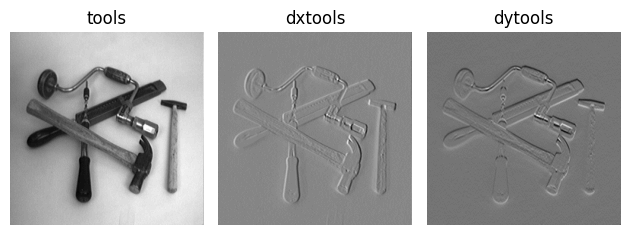

tools' shape:  (256, 256)
dxtools' shape:  (254, 254)
dytools' shape:  (254, 254)


In [3]:
tools = np.load("Images-npy/few256.npy")
dxtools =convolve2d(tools,deltax('central'),'valid')
dytools =convolve2d(tools,deltay('central'),'valid')

f = plt.figure()
f.subplots_adjust(wspace=0.1, hspace=0.2)
a1 = f.add_subplot(1,3, 1)
a1.set_title('tools')
showgrey(tools,False)
a2 = f.add_subplot(1,3, 2)
a2.set_title('dxtools')
showgrey(dxtools,False)
a3 = f.add_subplot(1,3, 3)
a3.set_title('dytools')
showgrey(dytools,False)
f.tight_layout()
plt.show()

#Question 1
print("tools' shape: ",tools.shape)
print("dxtools' shape: ",dxtools.shape)
print("dytools' shape: ",dytools.shape)

## Exercise 2 - Point-wise thresholding of gradient magnitudes

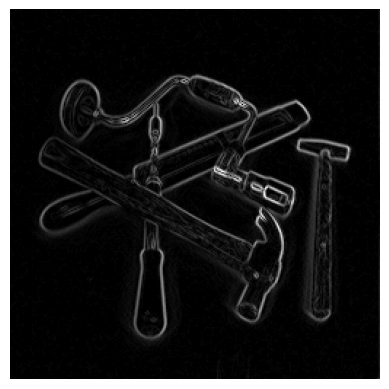

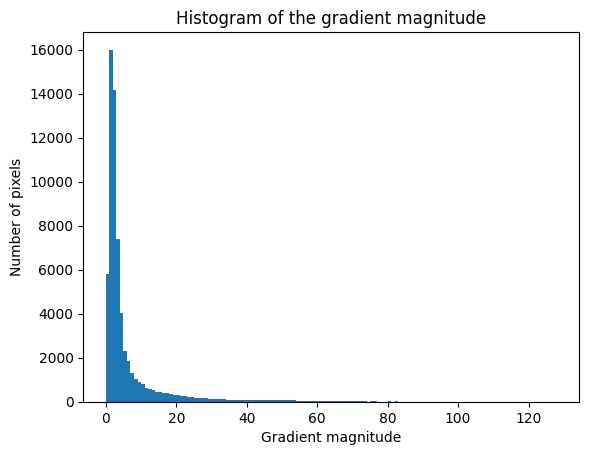

In [4]:
gradmagntools = np.sqrt(dxtools**2 + dytools**2)
showgrey(gradmagntools,False)
plt.show()

"""plot a histogram of the gradient magnitude"""
plt.hist(gradmagntools.ravel(), bins=128, range=(0,128))
plt.xlabel('Gradient magnitude')
plt.ylabel('Number of pixels')
plt.title('Histogram of the gradient magnitude')
plt.show()

In [5]:
def plot_thresholded_magnitude(thresholds,magnitude,subplots_shape,title):
        f = plt.figure()
        f.suptitle(title)
        f.subplots_adjust(wspace=0.1, hspace=0.2)
        a = np.zeros(len(thresholds), dtype=object)
        for i,threshold in enumerate(thresholds):
                a[i] = f.add_subplot(subplots_shape[0],subplots_shape[1], i+1)
                a[i].set_title('threshold: ' + str(threshold))
                showgrey((magnitude > threshold).astype(int),False)
        f.tight_layout()
        plt.show()

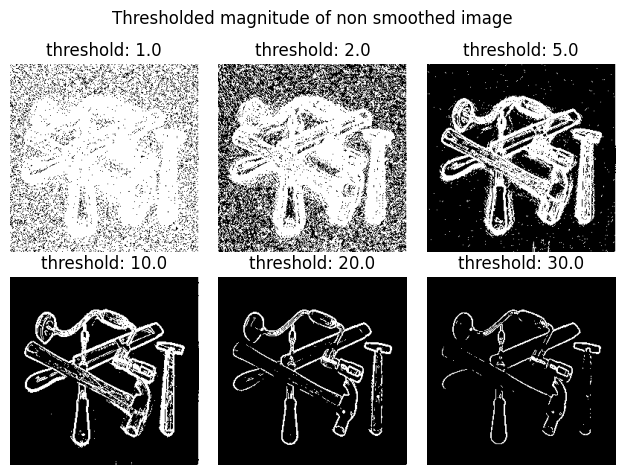

In [6]:
#Question 2
thresholds = [1.0,2.0,5.0,10.0,20.0,30.0] #try with different threshold values
plot_thresholded_magnitude(thresholds,gradmagntools,(2,3),"Thresholded magnitude of non smoothed image")

In [7]:
def Lv(inpic, shape = 'same'):
    """ Returns the magnitude of the gradient of an image."""
    Lx = convolve2d(inpic, deltax(), shape) 
    Ly = convolve2d(inpic, deltay(), shape) 
    return np.sqrt(Lx**2 + Ly**2)

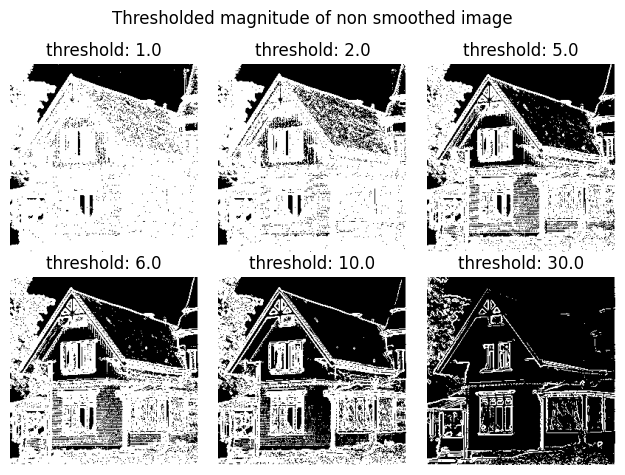

In [8]:
godthem = np.load("Images-npy/godthem256.npy")
godthem_mag = Lv(godthem)
thresholds = [1.0,2.0,5.0,6.0,10.0,30.0] #try with different threshold values
plot_thresholded_magnitude(thresholds,godthem_mag,(2,3),"Thresholded magnitude of non smoothed image")

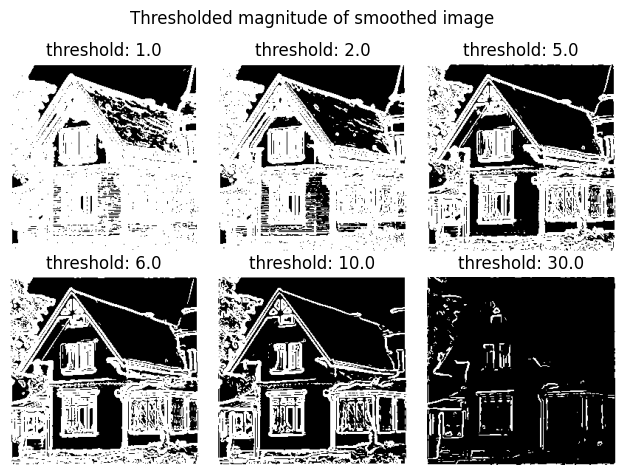

In [9]:
smoothed_godthem = gaussfft(godthem, 1.0)
smoothed_godthem_mag = Lv(smoothed_godthem)
thresholds = [1.0,2.0,5.0,6.0,10.0,30.0] #try with different threshold values
plot_thresholded_magnitude(thresholds,smoothed_godthem_mag,(2,3),"Thresholded magnitude of smoothed image")

## Exercise 4 - Compunting differential geometry descriptors

In [10]:
dx = np.array([0.5,0,-0.5])
dx_2d= np.outer(dx, dx)

# Normalize the filter to make sure it sums to zero
#dx_2d= dx_2d  - np.mean(dx_2d)

#dxx = scipy.signal.convolve2d(dx,dx)
dx_2d

array([[ 0.25,  0.  , -0.25],
       [ 0.  ,  0.  , -0.  ],
       [-0.25, -0.  ,  0.25]])

In [11]:
def Lvvtilde(inpic, shape = 'same'):
        """write a 5x5 np.array with all zeros apart from the 3d row being [0,0.5,0,-0.5,0]"""
        
        dxmask = np.zeros((5, 5))
        dxmask[2, :] = [0, 0.5, 0, -0.5, 0]
        dymask = dxmask.T

        dxxmask = np.zeros((5, 5))
        dxxmask[2, :] = [0, 1, -2, 1, 0]
        dyymask = dxxmask.T

        dxymask = convolve2d(dxmask, dymask)
        #dxxymask = convolve2d(dxxmask, dymask)
        #dxxxmask = convolve2d(dxxmask, dxmask)
        #dxyymask = convolve2d(dxymask, dymask)
        #dyyymask = convolve2d(dyymask, dymask)

        Lx = convolve2d(inpic, dxmask, shape)
        Ly = convolve2d(inpic, dymask, shape)
        Lxx = convolve2d(inpic, dxxmask, shape)
        Lyy = convolve2d(inpic, dyymask, shape)
        Lxy = convolve2d(inpic, dxymask, shape)

        result = Lx**2*Lxx + 2*Lx+Ly*Lxy+Ly**2*Lyy
        return result


def Lvvvtilde(inpic, shape = 'same'):
        dxmask = np.zeros((5, 5))
        dxmask[2, :] = [0, 0.5, 0, -0.5, 0]
        dymask = dxmask.T
        dxxmask = np.zeros((5, 5))
        dxxmask[2, :] = [0, 1, -2, 1, 0]
        dyymask = dxxmask.T

        dxymask = convolve2d(dxmask, dymask)
        dxxymask = convolve2d(dxxmask, dymask)
        dxxxmask = convolve2d(dxxmask, dxmask)
        dxyymask = convolve2d(dxymask, dymask)
        dyyymask = convolve2d(dyymask, dymask)

        Lx = convolve2d(inpic, dxmask, shape)
        Ly = convolve2d(inpic, dymask, shape)
        #Lxx = convolve2d(inpic, dxxmask, shape)
        #Lyy = convolve2d(inpic, dyymask, shape)
        #Lxy = convolve2d(inpic, dxymask, shape)
        Lxxx = convolve2d(inpic, dxxxmask, shape)
        Lxxy = convolve2d(inpic, dxxymask, shape)
        Lxyy = convolve2d(inpic, dxyymask, shape)
        Lyyy = convolve2d(inpic, dyyymask, shape)
        
        result = Lx**3*Lxxx + 3*Lx**2*Ly*Lxxy + 3*Lx*Ly**2*Lxyy + Ly**3*Lyyy
        return result


In [12]:
[x,y] = np.meshgrid(range(-5,6),range(-5,6))

dxmask = np.zeros((5, 5))
dxmask[2, :] = [0, 0.5, 0, -0.5, 0]
dymask = dxmask.T
dxxmask = np.zeros((5, 5))
dxxmask[2, :] = [0, 1, -2, 1, 0]
dyymask = dxxmask.T

dxymask = convolve2d(dxmask, dymask)
dxxymask = convolve2d(dxxmask, dymask)
dxxxmask = convolve2d(dxxmask, dxmask)
dxyymask = convolve2d(dxymask, dymask)
dyyymask = convolve2d(dyymask, dymask)

print(convolve2d(x**3,dxxxmask,'valid'))
print(convolve2d(x**3,dxxmask,'valid'))
print(convolve2d(x**2*y,dxxymask,'valid'))


[[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]]
[[-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]]
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]


In [13]:
#check that difference approximations are applied correctly
print(convolve2d(x**2,dxmask,'valid')) #d_x(x^n)=nx^(n-1)
print(convolve2d(x**2,dxxmask,'valid')) #d_x^n(x^n)=n!
print(convolve2d(x**2,dxxxmask,'valid')) #d_x^(n+k)(x^n)=0
print(convolve2d(y**2,dxxxmask,'valid')) #d_x^n(y^k)=0

[[-6. -4. -2.  0.  2.  4.  6.]
 [-6. -4. -2.  0.  2.  4.  6.]
 [-6. -4. -2.  0.  2.  4.  6.]
 [-6. -4. -2.  0.  2.  4.  6.]
 [-6. -4. -2.  0.  2.  4.  6.]
 [-6. -4. -2.  0.  2.  4.  6.]
 [-6. -4. -2.  0.  2.  4.  6.]]
[[2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


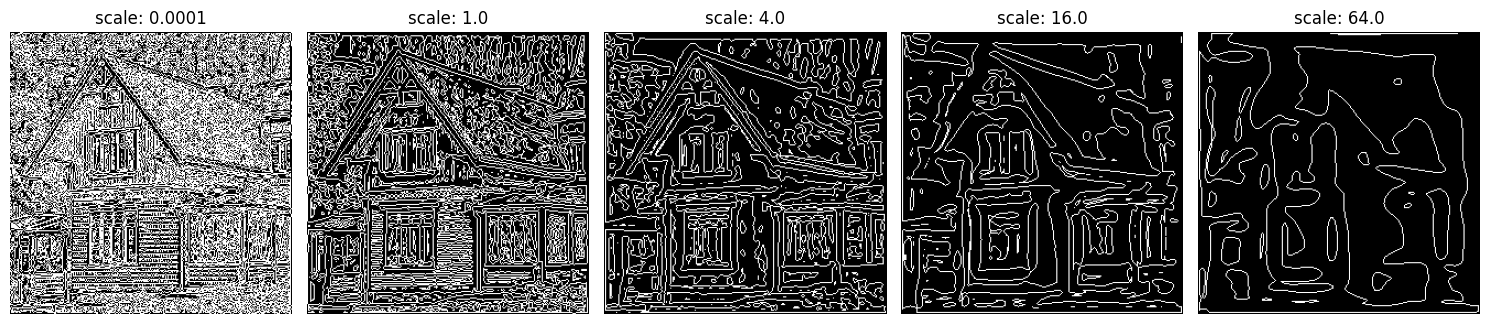

In [14]:
house = np.load("Images-npy/godthem256.npy")

scales = [0.0001, 1.0, 4.0, 16.0, 64.0]
f = plt.figure(figsize=(15,5))

f.subplots_adjust(wspace=0.1, hspace=0.2)
a = np.zeros(len(scales), dtype=object)
for i,scale in enumerate(scales):
        a[i] = f.add_subplot(1,5, i+1)
        a[i].set_title('scale: ' + str(scale))
        showgrey(contour(Lvvtilde(gaussfft(house, scale),'same')),False)
f.tight_layout()
plt.show()

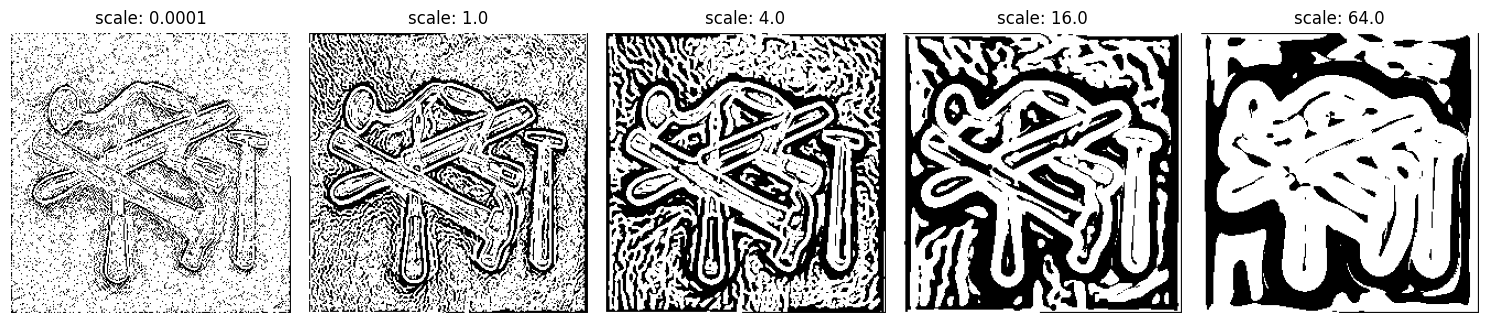

In [15]:
tools = np.load("Images-npy/few256.npy")
scales = [0.0001, 1.0, 4.0, 16.0, 64.0]
f = plt.figure(figsize=(15,5))

f.subplots_adjust(wspace=0.1, hspace=0.2)
a = np.zeros(len(scales), dtype=object)
for i,scale in enumerate(scales):
        a[i] = f.add_subplot(1,5, i+1)
        a[i].set_title('scale: ' + str(scale))
        showgrey((Lvvvtilde(gaussfft(tools, scale),'same')<0).astype(int),False)
f.tight_layout()
plt.show()

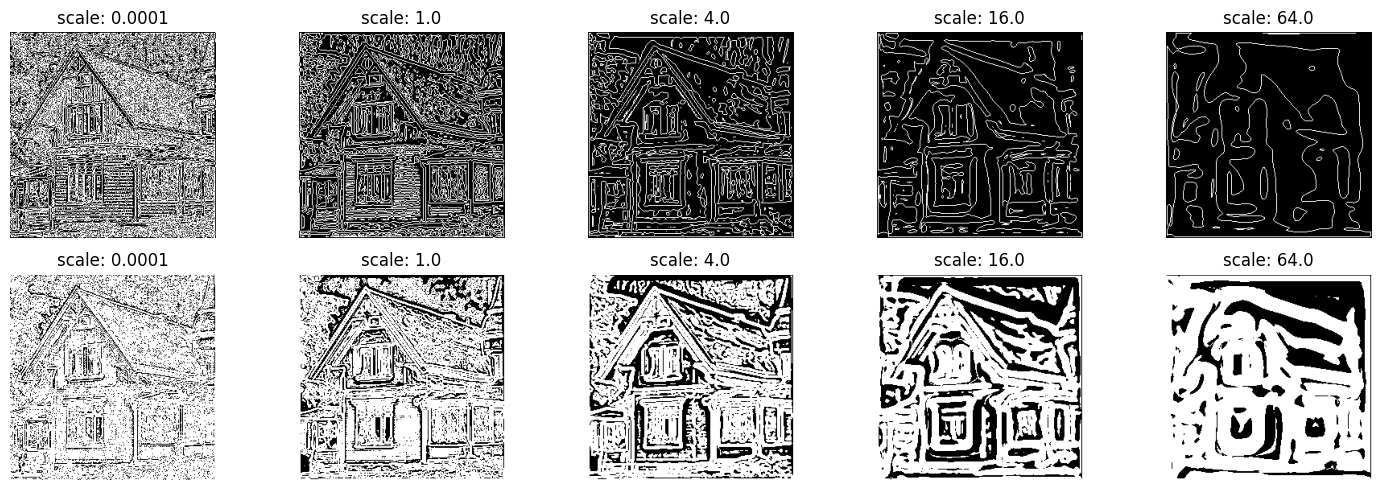

In [16]:
#Question 5
house = np.load("Images-npy/godthem256.npy")

scales = [0.0001, 1.0, 4.0, 16.0, 64.0]
f = plt.figure(figsize=(15,5))

f.subplots_adjust(wspace=0.1, hspace=0.2)
a = np.zeros(len(scales), dtype=object)
for i,scale in enumerate(scales):
        a[i] = f.add_subplot(2,5, i+1)
        a[i].set_title('scale: ' + str(scale))
        showgrey(contour(Lvvtilde(gaussfft(house, scale),'same')),False)
for i,scale in enumerate(scales):
        a[i] = f.add_subplot(2,5, i+6)
        a[i].set_title('scale: ' + str(scale))
        showgrey((Lvvvtilde(gaussfft(house, scale),'same')<0).astype(int),False)
f.tight_layout()
plt.show()

## Exercise 5 - Extraction of edge segments

In [17]:
def extractedge(inpic, scale, threshold, shape):
        Lv_result = Lv(gaussfft(inpic, scale), shape) #compute gradient magnitude
        Lvv = Lvvtilde(gaussfft(inpic, scale), shape) #compute approximation of second derivative
        Lvvv = Lvvvtilde(gaussfft(inpic, scale), shape) #compute approximation of third derivative
        Lvvv_mask = Lvvv < 0 #mask out positive values of 3rd derivative
        curves = zerocrosscurves(Lvv,Lvvv_mask) #find zero crossing curves with negative 3rd derivative
        Lvtilde_mask = Lv_result > threshold #mask out values below threshold
        curves = thresholdcurves(curves,Lvtilde_mask) #remove curves whose 1st derivative is below threshold
        overlaycurves(inpic, curves) #overlay curves on image
        return curves

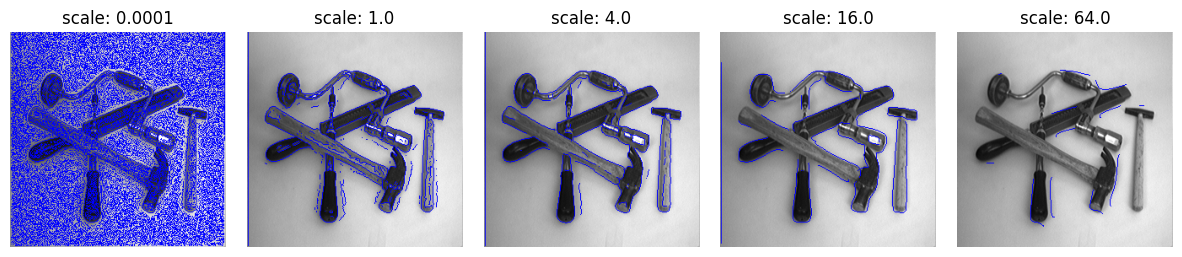

In [29]:
scales = [0.0001, 1.0, 4.0, 16.0, 64.0]
threshold = 5.0
f = plt.figure(figsize=(15,5))
f.subplots_adjust(wspace=0.1, hspace=0.2)

for i,scale in enumerate(scales):
        a = f.add_subplot(1,5, i+1)
        a.set_title('scale: ' + str(scale))
        curves = extractedge(tools, scale, threshold, 'same')

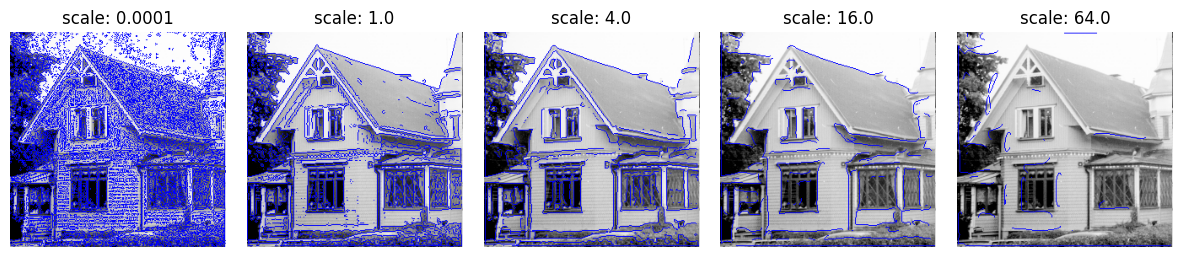

In [19]:
scales = [0.0001, 1.0, 4.0, 16.0, 64.0]
threshold = 3.0
f = plt.figure(figsize=(15,5))
f.subplots_adjust(wspace=0.1, hspace=0.2)

for i,scale in enumerate(scales):
        a = f.add_subplot(1,5, i+1)
        a.set_title('scale: ' + str(scale))
        extractedge(house, scale, threshold, 'same')

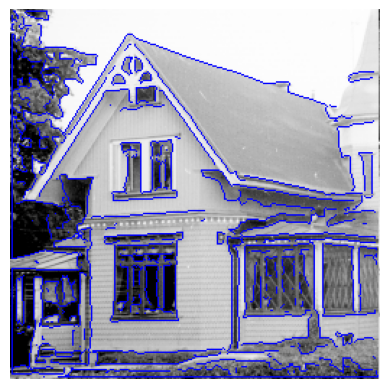

In [39]:
#Question 7 (tuna i parametri)
scale  =4.0
threshold = 5.0
result = extractedge(house, scale, threshold, 'same')

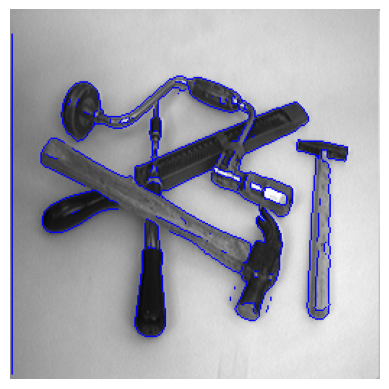

In [60]:
scale  =2.0
threshold = 8.0
result = extractedge(tools, scale, threshold, 'same')

## Exercise 6 - Hough Transform

In [247]:
def houghline(curves, magnitude, nrho, ntheta, threshold, nlines = 20, increment = 'unitary', verbose = False):
        num_points = len(curves[0])
        acc = np.zeros((nrho, ntheta))
        theta = np.linspace(-np.pi/2, np.pi/2, ntheta)
        d = np.sqrt(magnitude.shape[0]**2 + magnitude.shape[1]**2)
        rho = np.linspace(-d, d, nrho)
        
        for k in range(num_points):
                x_coord = curves[0][k]
                y_coord = curves[1][k]
                magn_xy = np.abs(magnitude[x_coord, y_coord])
                if magn_xy > threshold:
                        for i in range(ntheta):
                                # Loop over a set of theta values - rotate around point
                                rho_val = x_coord*np.cos(theta[i]) + y_coord*np.sin(theta[i])
                                # Compute index values in the accumulator space
                                j = np.argmin(np.abs(rho - rho_val)) #TODO: CHECK THIS
                                #j = np.where(rho < rho_val)[0][-1]
                                # Update the accumulator matrix - with the vote
                                if (increment == 'unitary'):
                                        acc[j,i] += 1
                                elif (increment == 'magnitude'):
                                        acc[j,i] += magn_xy
                                else:
                                        raise ValueError('Increment type not recognized')
                                

        acctmp = acc.copy()

        # Find local maxima in acctmp
        pos,value,_ = locmax8(acctmp)
        
        # Sort values and get indices
        indexvector = np.argsort(value)[-nlines:]
        pos = pos[indexvector,:]
        linepar = np.zeros((2, nlines))
        
                        
        for idx in range(nlines): 
                thetaidxacc = pos[idx, 0]
                rhoidxacc = pos[idx, 1]
                theta_value = theta[thetaidxacc]
                rho_value = rho[rhoidxacc]
                linepar[:, idx] = np.array([rho_value, theta_value])
                x0 = rho_value * np.cos(theta_value)
                y0 = rho_value * np.sin(theta_value)
                dx = d * (-np.sin(theta_value))
                dy = d * (np.cos(theta_value))
                plt.plot([y0 - dy, y0, y0 + dy], [x0 - dx, x0, x0 + dx], "r-")
                plt.title('Hough transform')
  
        
                
        plt.show()
        return linepar, acc

def houghedgeline(pic, scale, gradmagnthreshold, nrho, ntheta, nlines = 20,increment = 'unitary',verbose = False):
        curves = extractedge(pic, scale, gradmagnthreshold, 'same')
        magnitude = Lv(pic, 'same')
        #overlaycurves(pic, curves)
        linepar, acc = houghline(curves, magnitude, nrho, ntheta, gradmagnthreshold, nlines, increment,verbose)
        if verbose:
                f = plt.figure(figsize=(15,5))
                f.subplots_adjust(hspace=0.5, wspace=0.5)
                a2 = f.add_subplot(1,2, 1)
                a2.set_title('Magnitude')
                magnitude_tresholded = magnitude.copy()
                magnitude_tresholded[magnitude < threshold] = 0
                showgrey(magnitude_tresholded, False)
                a3 = f.add_subplot(1,2, 2)
                a3.set_title('Accumulator')
                showgrey(acc, False)
                plt.show()
        
        plt.show()

        return linepar, acc


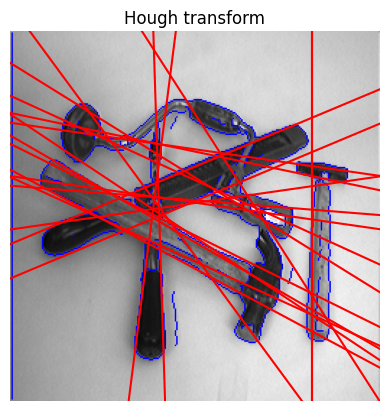

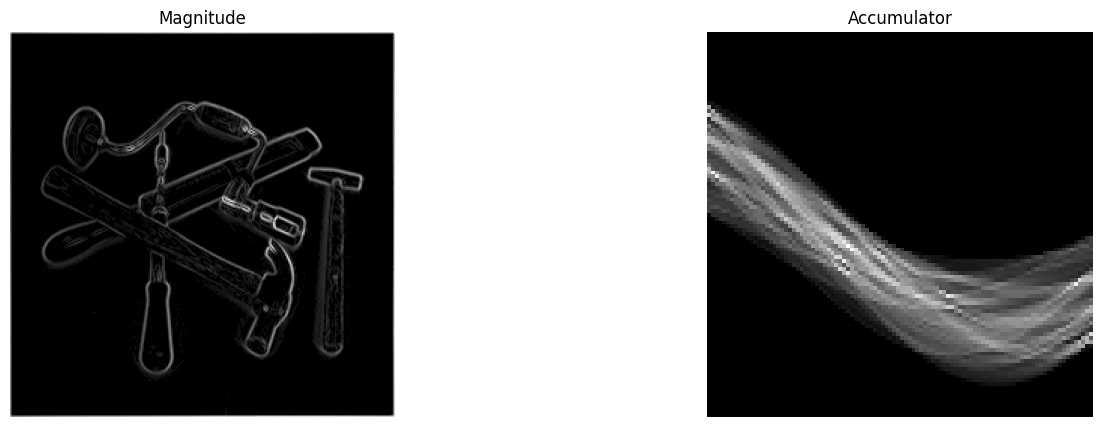

In [199]:
linepar, acc = houghedgeline(pic = tools, scale = 4.0, gradmagnthreshold=5.0, 
                           nrho= 100, ntheta=100, nlines=20, verbose=True)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


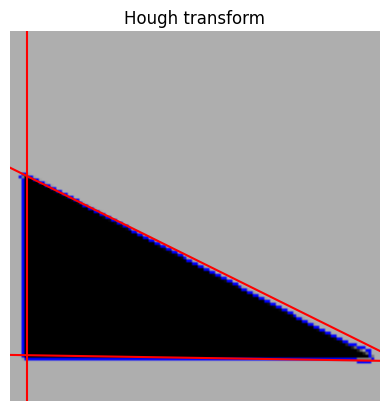

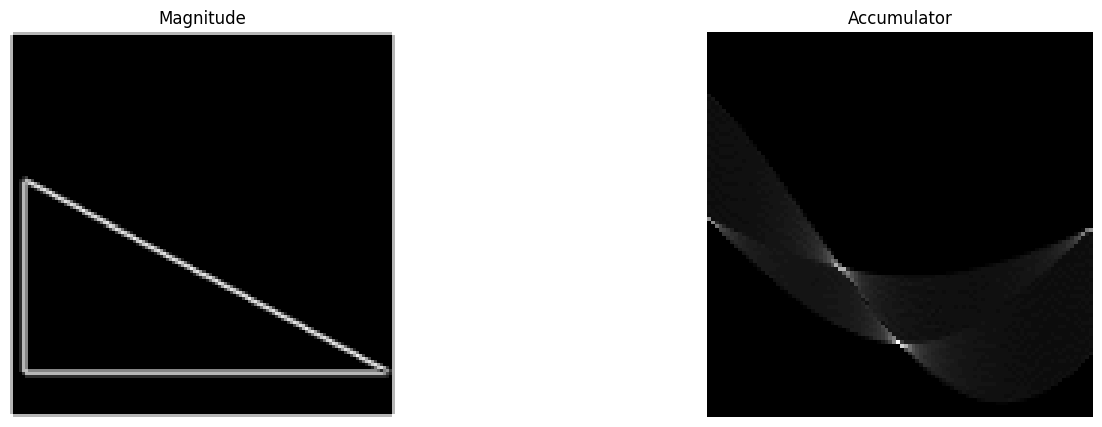

In [223]:
testimage1 = np.load("Images-npy/triangle128.npy") 
smalltest1 = binsubsample(testimage1)
_,_ = houghedgeline(pic = testimage1, scale = 4.0, gradmagnthreshold=5.0, 
                           nrho= 100, ntheta=100, nlines=3, verbose=True)

#Question 8



[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


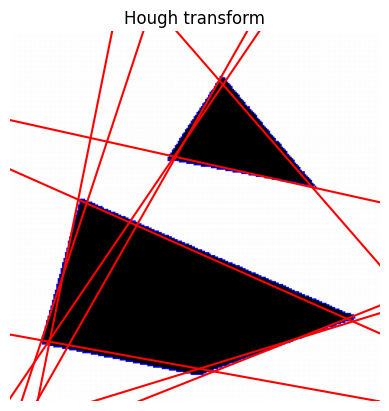

In [228]:
testimage2 = np.load("Images-npy/houghtest256.npy") 
smalltest2 = binsubsample(binsubsample(testimage2))
_,_ = houghedgeline(pic = testimage2, scale = 2.0, gradmagnthreshold=1.0, 
                           nrho= 80, ntheta=80, nlines=10, verbose=False)

### Question 9

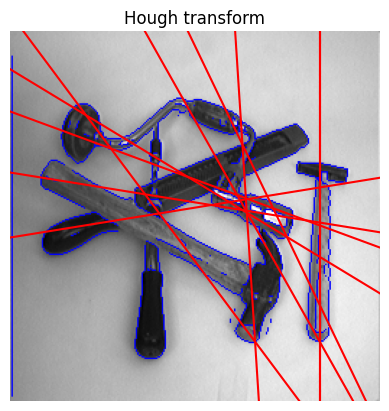

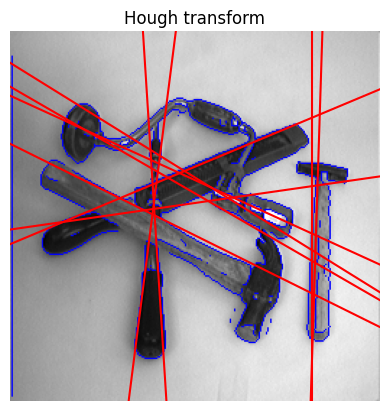

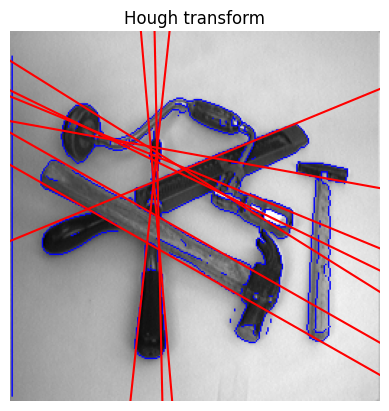

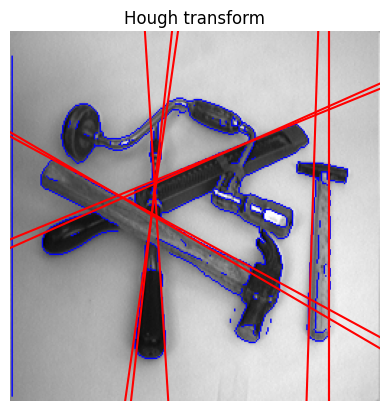

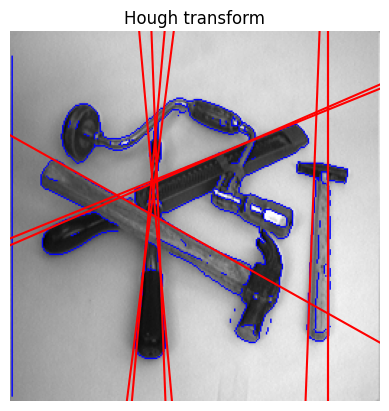

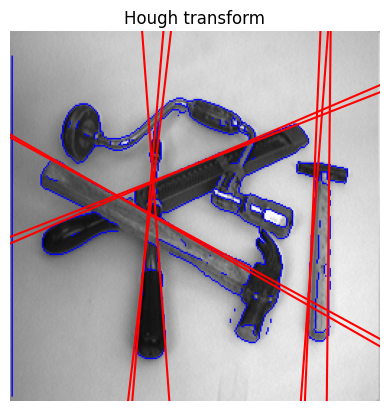

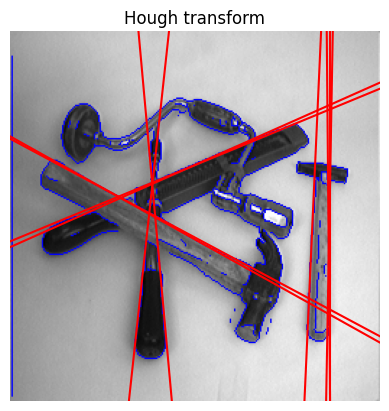

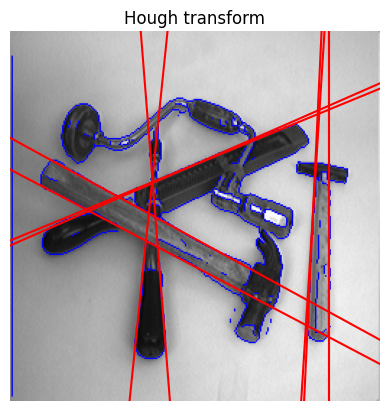

Text(0.5, 1.0, 'Time taken for different number of cells')

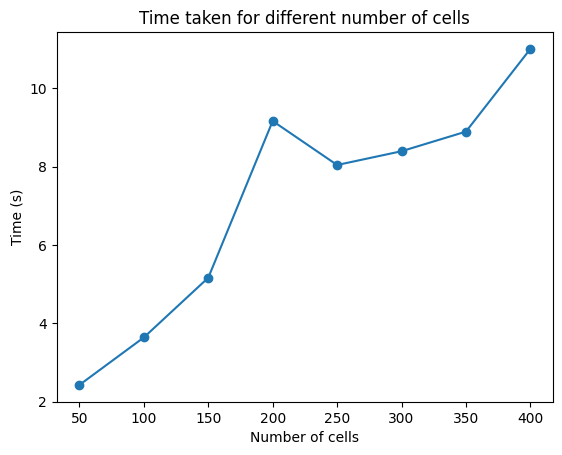

In [240]:
img  = np.load("Images-npy/few256.npy") 
cell_sizes = [50,100, 150, 200, 250, 300, 350, 400]
times = []
for size in cell_sizes:
        start_time = time.time()
        _,_ = houghedgeline(pic = img, scale = 2.0, gradmagnthreshold=8.0, 
                                   nrho= size, ntheta=size, nlines=10, verbose=False) 
        end_time = time.time()
        times.append(end_time-start_time)

plt.plot(cell_sizes, times, '-o')
plt.xlabel('Number of cells')
plt.ylabel('Time (s)')
plt.title('Time taken for different number of cells')

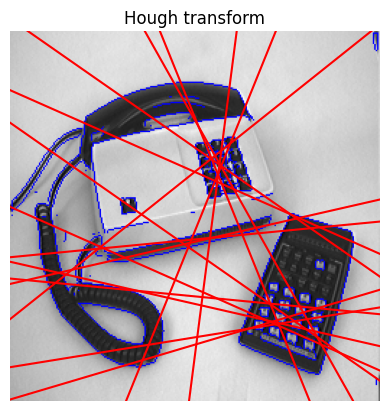

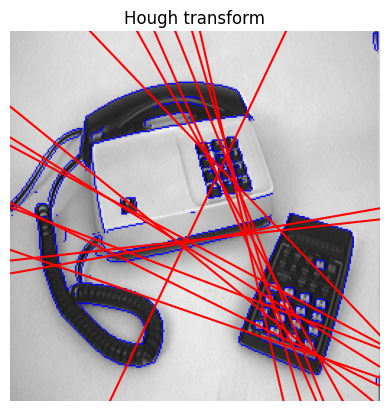

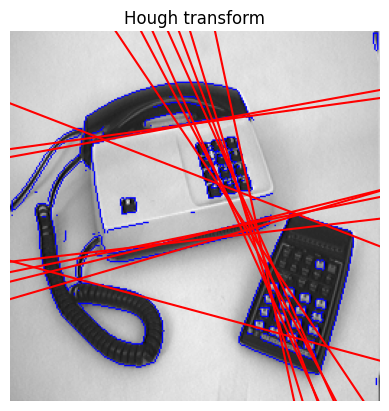

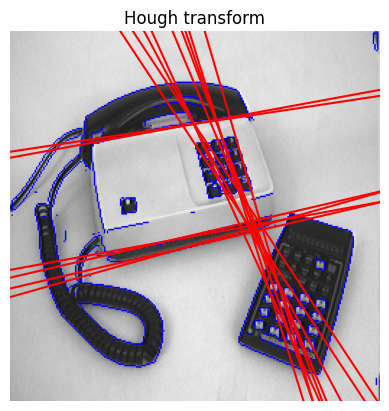

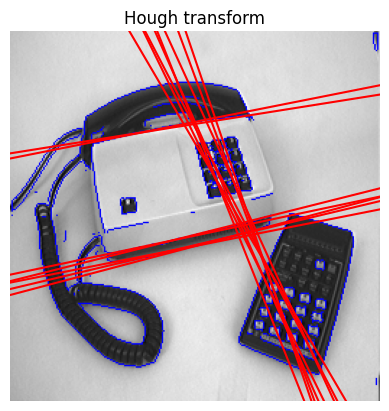

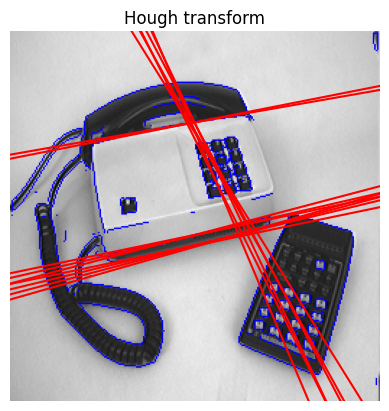

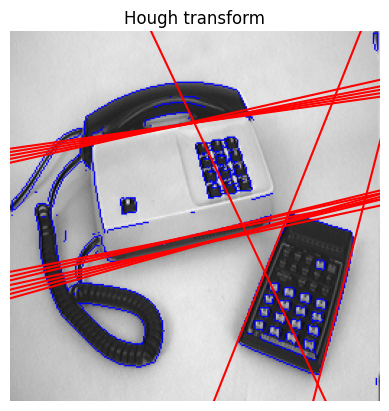

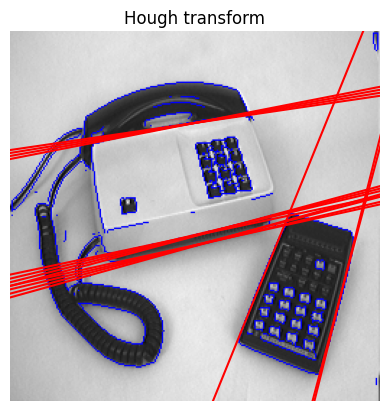

Text(0.5, 1.0, 'Time taken for different number of cells')

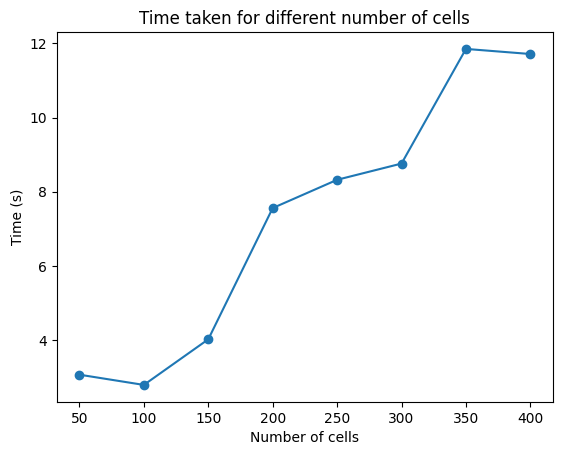

In [241]:
img  = np.load("Images-npy/phonecalc256.npy") 

cell_sizes = [50, 100, 150, 200, 250, 300, 350, 400]
times = []
for size in cell_sizes:
        start_time = time.time()
        _,_ = houghedgeline(pic = img, scale = 4.0, gradmagnthreshold=5.0, 
                                   nrho= size, ntheta=size, nlines=15, verbose=False) 
        end_time = time.time()
        times.append(end_time-start_time)

plt.plot(cell_sizes, times, '-o')
plt.xlabel('Number of cells')
plt.ylabel('Time (s)')
plt.title('Time taken for different number of cells')

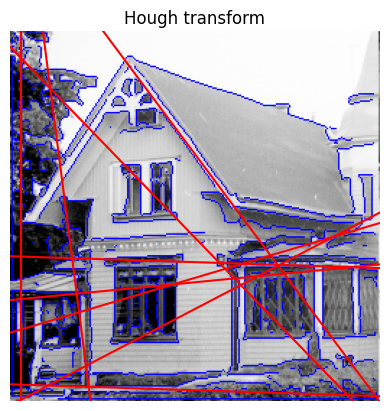

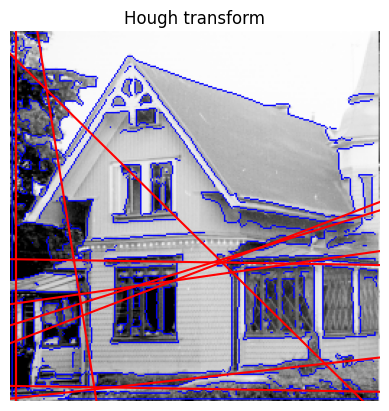

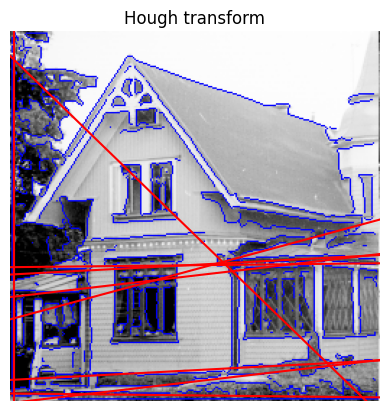

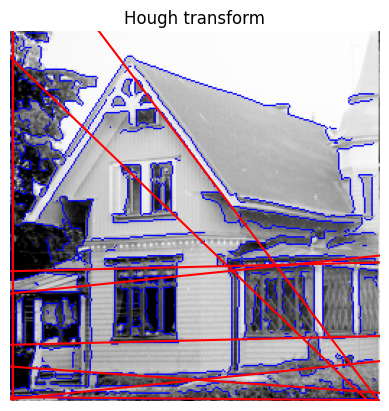

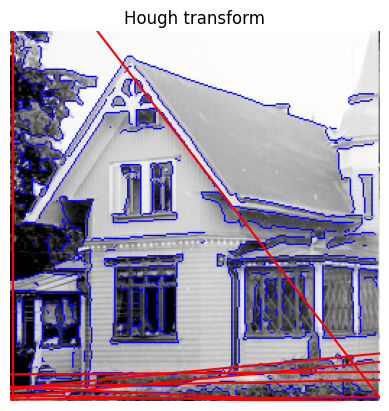

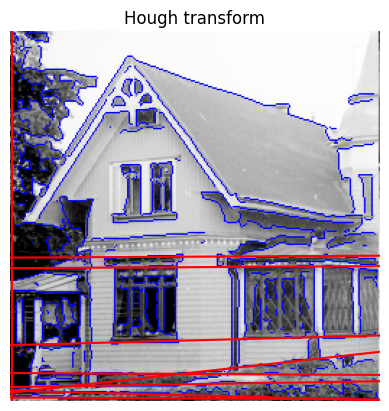

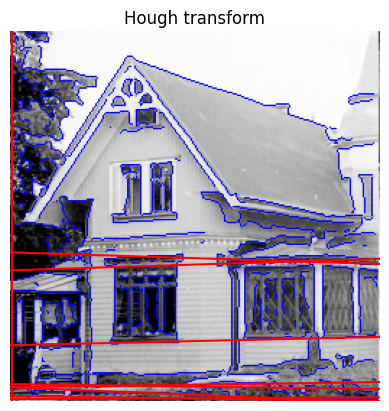

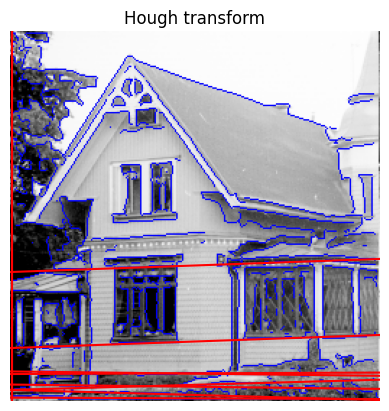

Text(0.5, 1.0, 'Time taken for different number of cells')

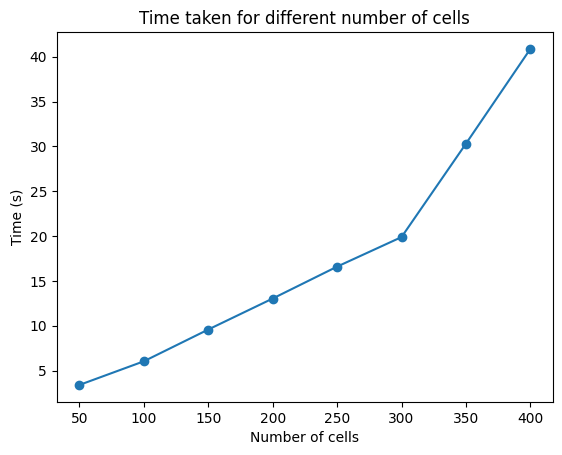

In [243]:
img  = np.load("Images-npy/godthem256.npy") 
cell_sizes = [50, 100, 150, 200, 250, 300, 350, 400]
times = []
for size in cell_sizes:
        start_time = time.time()
        _,_ = houghedgeline(pic = img, scale = 4.0, gradmagnthreshold=5.0, 
                                   nrho= size, ntheta=size, nlines=10, verbose=False) 
        end_time = time.time()
        times.append(end_time-start_time)

plt.plot(cell_sizes, times, '-o')
plt.xlabel('Number of cells')
plt.ylabel('Time (s)')
plt.title('Time taken for different number of cells')

### Question 10

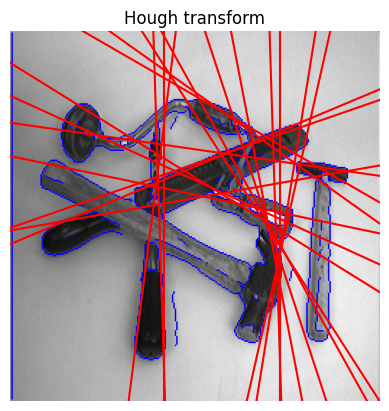

In [248]:
linepar, acc = houghedgeline(pic = tools, scale = 4.0, gradmagnthreshold=5.0, 
                           nrho= 100, ntheta=100, nlines=20, increment = 'magnitude',verbose=False)

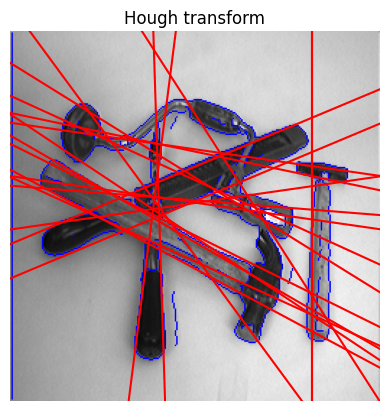

In [249]:
linepar, acc = houghedgeline(pic = tools, scale = 4.0, gradmagnthreshold=5.0, 
                           nrho= 100, ntheta=100, nlines=20, increment = 'unitary',verbose=False)